# C4021 - Group Project 2.3

### NAME: Abhijit Sinha
### Student ID: 18195067

## Problem Statement: Telecom Customer Churn Prediction

Binary Classification Problem to predict the Telecom customer churn which is one of the major problem Telecom industry is facing today.


## Dataset Information

####   Source: https://www.kaggle.com/blastchar/telco-customer-churn 

#### Context: 
"Predict behavior to retain customers. Analyze all the relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

#### Content: 
Each row represents a customer, each column contains customers attributes described on the column Metadata.

##### The data set includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

## Algorithm Used: Support Vector Machine (for Binary Classification)

-------------------------------------------------------------------------------------------------------------

## Team Contributions:

### Training data

### Pre-processing
- Garret: Provided insight in data preprocessing suggesting to count the values per category and analyze if they are releavent. If not the features can be dropped. Histogram is used for this approach to find such features and find outliers

### Algorithm training and evaluation

### Visualization of outputs
- Andrew: Suggested to use the correlation matrix for visualization and deeper undersatnding of the correlation between the features.

-------------------------------------------------------------------------------------------------------------

### Import the libraries 

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

# Visualization and plotting
import matplotlib.pyplot as plt

# Data Pre-processing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Model training, cross-validation and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Data Set
#### Load the CSV file into Pandas dataframe

In [2]:
dataframe = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
# Features available in the dataset
dataframe.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [4]:
# Lets see the how many Churn values are present per category
# We can see that its a Binary classification problem as there are 2 outcomes.

dataframe.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Basic data exploration of the input Dataframe

In [5]:
# Check the data dimension
dataframe.shape

(7043, 21)

In [6]:
# Print the first 5 rows of the dataframe to get a feel for the data
dataframe.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Lets have a look into the numeric features
dataframe.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# Lets have a look into the categorical features
dataframe.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,4295-YURET,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


### Analyze and plot the features with customer Churn to find Correlation between features
Lets analyze the feature correlations by pivoting features against each other

In [9]:
dataframe.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Data has the following feature categories

#### Demographic info about customers 
    – gender, senior citizen, and family members (if customers have partners and dependents)
    
####  Services that each customer has signed up for 
    – phone service, multiple lines, internet, online security, online backup, device protection, tech support, streaming TV and movies

#### Customer account information 
    – Tenure, contract, payment method, paperless billing, monthly charges, and total charges


In [10]:
# Plot histograms to show distribution of features by outcome categories (Depy2016)

def plot_histogram_dv(x,y):
    
    plt.hist(list(x[y=="No"]), alpha=0.5, facecolor='blue', label='Churn=0')
    plt.hist(list(x[y=="Yes"]), alpha=0.75, facecolor='green', label='Churn=1')
    plt.title("Histogram of '{var_name}' by Customer Churn".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper right')
    plt.show()

##### Churn rate Analysis on Demographic Info of Customers

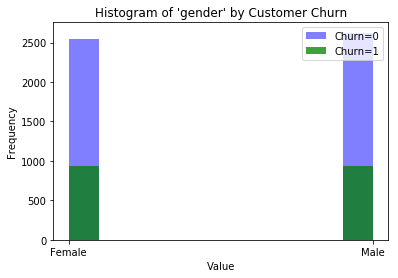

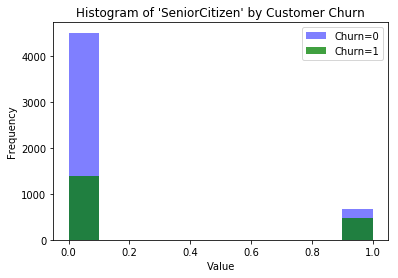

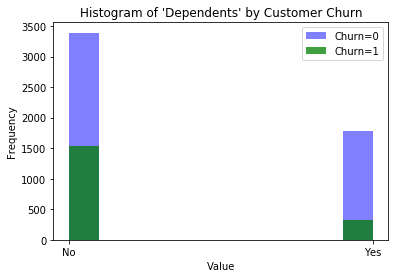

In [11]:
demographic_info = ['gender', 'SeniorCitizen', 'Dependents']

# Churn by Demographic data: 
for demo in demographic_info:
    plot_histogram_dv(dataframe[demo], dataframe.Churn) ## need to use barplots here

#### Observations:
- Gender doesn't show much info on Churn rate
- Senior Citizen are less likely to Churn
- Dependents are less likely to Churn

##### Churn rate Analysis on Services used by Customers

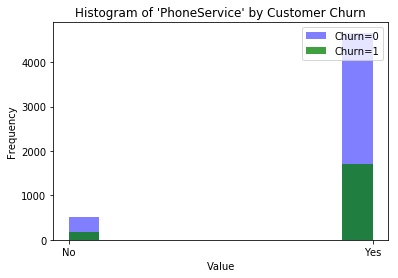

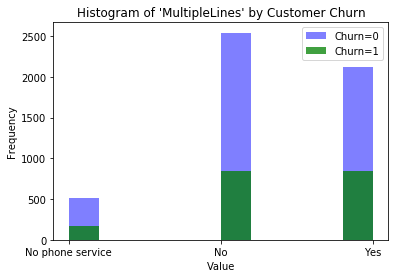

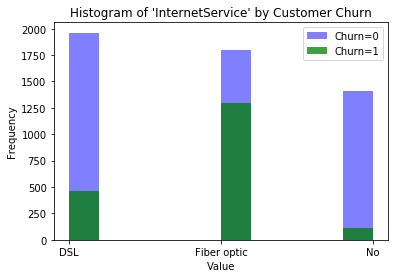

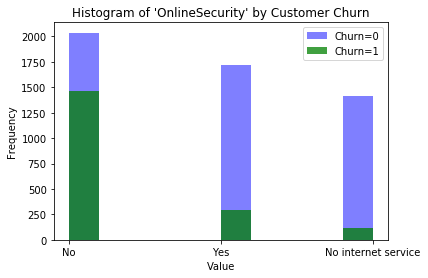

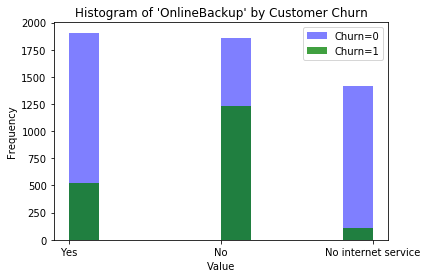

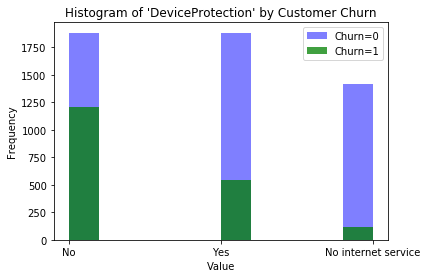

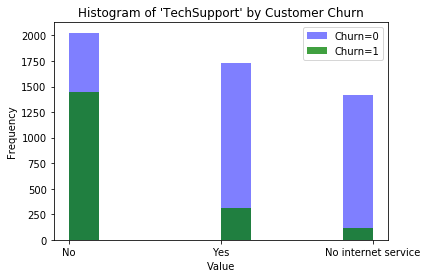

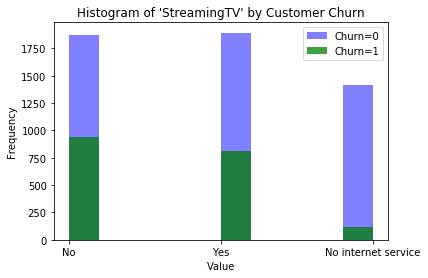

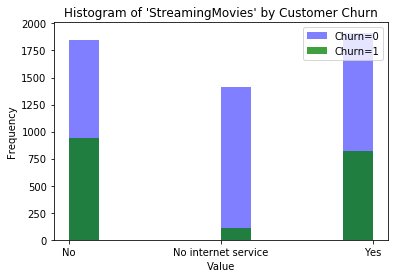

In [12]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Churn by Services: 
for service in services:
    plot_histogram_dv(dataframe[service], dataframe.Churn)
    

#### Observations:
- Customers using Phone services Churn more
- Multiple Lines has no significant effect on customer Churn
- Customers using Internet Service with Fiber Optics has high Churn
- Customers without Online security has high Churn
- Online Backup has so significant impact on Churn
- Customers without Device Protection has high Churn
- Customers without Tech Support has high Churn
- Steaming TV and movies has so no definite impact on Churn


##### Churn rate Analysis on the Account Information

In [13]:
account_info = ['tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']

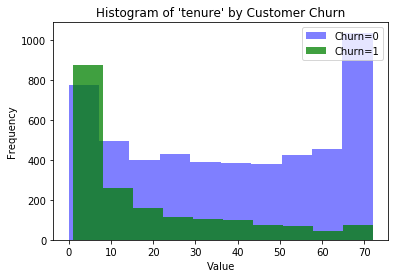

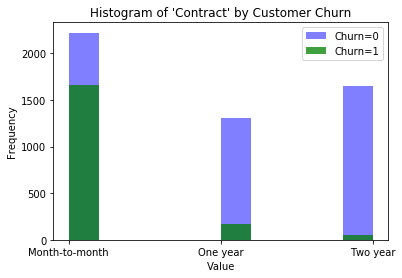

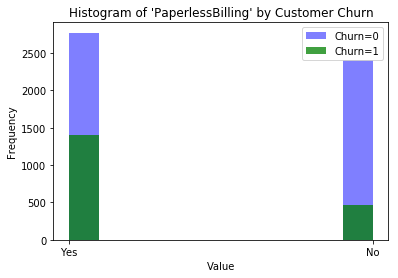

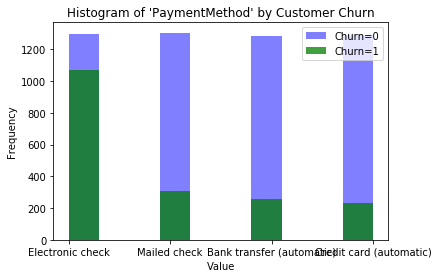

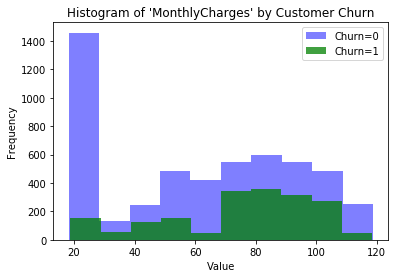

In [14]:
for info in account_info:
    plot_histogram_dv(dataframe[info], dataframe.Churn)


#### Observations:
- Customer with short term Tenure has High Churn 
- Customer with month to month contract Churn a lot (Telecom company need long term plan) 
- Paperless Billing opting customers has high Churn rate
- Customers with monthly charges in the range of 70-110 has High Churn rate

# 2. Data-Preprocessing

### Basic data cleaning process


##### Models can only handle numeric features
##### Categorical and ordinal features must be converted into numeric features before training the model


-  Check the data type (int, float, string) of features in the dataframe
-  Convert string to numeric data

In [15]:
# Find the categorical variables in the dataset 

# Code is inspired from the Depy2016 tutorial: 
# https://github.com/aprilypchen/depy2016/blob/master/DePy_Talk.ipynb

for col_name in dataframe.columns:
    if dataframe[col_name].dtypes == 'object':
        unique_cat = len(dataframe[col_name].unique())
        print("Feature '{}' has {} unique categories".format(col_name, unique_cat))

Feature 'customerID' has 7043 unique categories
Feature 'gender' has 2 unique categories
Feature 'Partner' has 2 unique categories
Feature 'Dependents' has 2 unique categories
Feature 'PhoneService' has 2 unique categories
Feature 'MultipleLines' has 3 unique categories
Feature 'InternetService' has 3 unique categories
Feature 'OnlineSecurity' has 3 unique categories
Feature 'OnlineBackup' has 3 unique categories
Feature 'DeviceProtection' has 3 unique categories
Feature 'TechSupport' has 3 unique categories
Feature 'StreamingTV' has 3 unique categories
Feature 'StreamingMovies' has 3 unique categories
Feature 'Contract' has 3 unique categories
Feature 'PaperlessBilling' has 2 unique categories
Feature 'PaymentMethod' has 4 unique categories
Feature 'TotalCharges' has 6531 unique categories
Feature 'Churn' has 2 unique categories


In [16]:
# Customer ID doesn't show any meaningful info as its unique per customer and can be dropped from the data set

dataframe.drop(["customerID"], axis=1, inplace=True)

In [17]:
# Assign outcome as 0 if columns has value "No" and as 1 if columns value is "Yes"
binary_column_conversion = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Column conversion
for item in binary_column_conversion:
    dataframe[item] = [1 if each == 'Yes' else 0 for each in dataframe[item]]

# Gender conversion
dataframe["gender"] = [1 if each == 'Male' else 0 for each in dataframe["gender"]]

dataframe.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [18]:
# Checking the data types and counts of all the columns
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(8), object(11)
memory usage: 1.1+ MB


#### The Total Charges is shown as a string and not a numeric number. Lets do some investigation and fix that

In [19]:
# The Total Charges sections has some empty spaces/blank sections
# Lets convert the TotalCharges to numerical data type. 
# errors='coerce' will convert the invalid parsed data as NaN

dataframe.TotalCharges = pd.to_numeric(dataframe.TotalCharges, errors='coerce')
dataframe.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

#### Handling missing data
- Models can not handle missing data
- Used imputation to fill in missing data with **mean** strategy
    

In [20]:
# Check for missing values

dataframe.isnull().sum().sort_values(ascending=False).head()

TotalCharges     11
Churn             0
SeniorCitizen     0
Partner           0
Dependents        0
dtype: int64

There are 11 missing values for Total Charges
- Lets Impute the missing values

In [21]:
# Let's convert all the categorical variables into dummy variables before Imputing
# We will be using this dataframe going forward

dataframe_dummies = pd.get_dummies(dataframe)
dataframe_dummies.head(5)

# Number of Colmuns have doubled from 21 to 42 now

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [22]:
# Imputing the missing data using the mean

imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

missingData = dataframe_dummies.iloc[:,0:].values

imputer.fit(missingData)

completedData = imputer.transform(missingData)

dataframe_dummies.iloc[:, 0:] = completedData

In [23]:
# Re-Check is any missing values are still there
dataframe_dummies.isnull().sum().sort_values(ascending=False).head(3)

PaymentMethod_Mailed check            0
OnlineBackup_No                       0
OnlineSecurity_No internet service    0
dtype: int64

In [24]:
# Check if there are any strong correlation between feature and outcome

dataframe_dummies.corr()["Churn"].sort_values(ascending=False)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling                           0.191825
SeniorCitizen                              0.150889
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService                               0.011942
gender                                    -0.008612
MultipleLines_No phone service            -0.011942
MultipleLine

#### TODO: Add observation of the correlation

### Outlier detection
##### Code is inspired from the Depy2016 tutorial: https://github.com/aprilypchen/depy2016/blob/master/DePy_Talk.ipynb

In [25]:
def find_outliers_tukey(x):
    """ Function to find the outliers """
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values


In [26]:
# Create a temp dataframe named "dataset" for testing Outliers
dataset = dataframe_dummies

for features in dataset.columns.values:
    # Find the Outliers in the dataset 
    tukey_indices, tukey_values = find_outliers_tukey(dataset[features])

    print("Shape Before Outlier Removal")
    print(dataset.shape)
    print("Outliers = ",len(tukey_indices), "out of ",len(dataset[features]), "in {} Column".format(features))
    for i in range(len(tukey_indices)):
        dataset = dataset.drop([tukey_indices[i]], axis=0)
    print("Shape After Outlier Removal")
    print(dataset.shape)

# Store dataframe with outlier
tukey_dataset = dataframe.values


Shape Before Outlier Removal
(7043, 41)
Outliers =  0 out of  7043 in gender Column
Shape After Outlier Removal
(7043, 41)
Shape Before Outlier Removal
(7043, 41)
Outliers =  1142 out of  7043 in SeniorCitizen Column
Shape After Outlier Removal
(5901, 41)
Shape Before Outlier Removal
(5901, 41)
Outliers =  0 out of  5901 in Partner Column
Shape After Outlier Removal
(5901, 41)
Shape Before Outlier Removal
(5901, 41)
Outliers =  0 out of  5901 in Dependents Column
Shape After Outlier Removal
(5901, 41)
Shape Before Outlier Removal
(5901, 41)
Outliers =  0 out of  5901 in tenure Column
Shape After Outlier Removal
(5901, 41)
Shape Before Outlier Removal
(5901, 41)
Outliers =  578 out of  5901 in PhoneService Column
Shape After Outlier Removal
(5323, 41)
Shape Before Outlier Removal
(5323, 41)
Outliers =  0 out of  5323 in PaperlessBilling Column
Shape After Outlier Removal
(5323, 41)
Shape Before Outlier Removal
(5323, 41)
Outliers =  0 out of  5323 in MonthlyCharges Column
Shape After Ou

- Outliers =  1142 out of  7043 in SeniorCitizen Column
- Outliers =  19 out of  5901 in TotalCharges Column
- Outliers =  578 out of  5882 in MultipleLines_No phone service Column
- Outliers =  1150 out of  5304 in Contract_One year Column
- Outliers =  884 out of  4154 in PaymentMethod_Bank transfer (automatic) Column

### Split the dataframe into Input Features and Labels/Outcomes

In [27]:
# Dropping the Outcome(Churn) column from the data to Split into input features (X) and outcome (y) variables

X = dataframe_dummies.drop("Churn", axis=1)
y = dataframe_dummies["Churn"]

In [28]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,29.85,29.85,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,56.95,1889.50,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,2.0,1.0,1.0,53.85,108.15,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,45.0,0.0,0.0,42.30,1840.75,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2.0,1.0,1.0,70.70,151.65,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Create correlation matrix
#### Reference: CE4031 Lab week 6


Correlation matrix:
 [[ 1.00000000e+00 -1.87371164e-03 -1.80807966e-03 ...  1.21477947e-03
   7.52180701e-04  1.37441733e-02]
 [-1.87371164e-03  1.00000000e+00  1.64786576e-02 ... -2.41353724e-02
   1.71717779e-01 -1.53477490e-01]
 [-1.80807966e-03  1.64786576e-02  1.00000000e+00 ...  8.20291965e-02
  -8.38516894e-02 -9.51248588e-02]
 ...
 [ 1.21477947e-03 -2.41353724e-02  8.20291965e-02 ...  1.00000000e+00
  -3.73322286e-01 -2.86049419e-01]
 [ 7.52180701e-04  1.71717779e-01 -8.38516894e-02 ... -3.73322286e-01
   1.00000000e+00 -3.87371871e-01]
 [ 1.37441733e-02 -1.53477490e-01 -9.51248588e-02 ... -2.86049419e-01
  -3.87371871e-01  1.00000000e+00]]


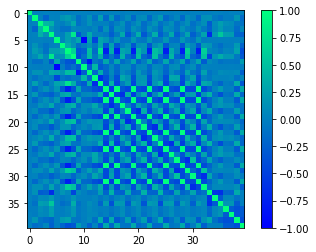

In [39]:
corr_mat = np.corrcoef(X, rowvar=False)
print("\nCorrelation matrix:\n", corr_mat)


# TODO: SNS or better map wth labels
# Generate a heatmap of the correlation matrix
plt.imshow(corr_mat, cmap='winter')

# Plots colourbar as seen on right hand side
plt.colorbar() 

plt.show()

### Split data set into training and test datasets

In [30]:
# Use train_test_split in sklearn to split the data in training and test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle= True, random_state=42)

print(dataframe.shape)
print(X.shape)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(7043, 20)
(7043, 40)
(5634, 40)
(1409, 40)
(5634,)
(1409,)


### Scaling the data 

#### For Support Vector machines we need to standardize the features by removing the mean and scaling to unit variance

##### Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [31]:
# Store the features labels
features = X.columns.values

# Scale the data with respect to the training data set
scaler = StandardScaler()
scaler.fit(X_train)

# Scaling the Train data set using the transform defined by the train set.
X_scaled_train = pd.DataFrame(scaler.transform(X_train))

# Scaling the Test set using the transform defined by the train set.
X_scaled_test = pd.DataFrame(scaler.transform(X_test))

# Add the features back for display purpose
X_scaled_train.columns = features
X_scaled_train.head()


# TODO: Can add visulatizion before and after scaling?

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.025166,-0.437749,-0.969579,1.532186,-0.465683,0.329573,-1.200007,-0.000474,-0.422099,1.04801,...,-0.807289,-0.524081,1.250762,-1.099339,1.910109,-0.558353,-0.530678,-0.527656,-0.709650,1.84247
1,-1.025166,-0.437749,-0.969579,-0.652662,0.885537,0.329573,0.833328,1.074754,1.255366,-0.95419,...,-0.807289,-0.524081,1.250762,-1.099339,-0.523530,1.790982,1.884380,-0.527656,-0.709650,-0.54275
2,0.975452,-0.437749,1.031376,-0.652662,-1.284605,-3.034225,0.833328,-1.376499,-1.002985,-0.95419,...,1.238714,-0.524081,-0.799513,0.909638,-0.523530,-0.558353,-0.530678,-0.527656,1.409146,-0.54275
3,0.975452,-0.437749,-0.969579,-0.652662,-1.161766,0.329573,0.833328,0.177346,-0.908113,1.04801,...,1.238714,-0.524081,-0.799513,0.909638,-0.523530,-0.558353,-0.530678,-0.527656,1.409146,-0.54275
4,0.975452,-0.437749,-0.969579,1.532186,-1.325551,0.329573,0.833328,-0.098524,-0.003468,-0.95419,...,1.238714,-0.524081,-0.799513,-1.099339,-0.523530,1.790982,1.884380,-0.527656,-0.709650,-0.54275


### Analysis on Dimensionality Reduction using PCA on the dataset

#### Using PCA on the training data from sklearn.decompostion to find the principal components
#### Based on the proportion of variance for each principal component we can determine the number of features to be used as input features in the model. 

###### Reference: CE4031 Lab week 6

Singular values = 
 [2.50495860e+02 1.80242845e+02 1.41372203e+02 1.06053363e+02
 9.69476715e+01 8.79122394e+01 8.62068784e+01 8.51619156e+01
 8.45921083e+01 8.22323269e+01 8.10148461e+01 7.90934855e+01
 7.55176681e+01 7.49813342e+01 7.24625671e+01 7.10768217e+01
 6.93449533e+01 6.67860409e+01 6.56592056e+01 5.21254462e+01
 4.55030730e+01 1.84707212e+01 2.30743692e+00 1.15932860e-13
 6.79901263e-14 3.35425371e-14 3.33273228e-14 2.84592437e-14
 2.19157875e-14 1.54811647e-14 1.54811647e-14 1.54811647e-14
 1.54811647e-14 1.54811647e-14 1.54811647e-14 1.54811647e-14
 1.54811647e-14 1.54811647e-14 1.41427397e-14 3.80730966e-15]

Proportion of variance = 
 [2.78435285e-01 1.44158161e-01 8.86852141e-02 4.99082170e-02
 4.17059416e-02 3.42942929e-02 3.29766857e-02 3.21820725e-02
 3.17528611e-02 3.00060152e-02 2.91240916e-02 2.77590497e-02
 2.53058138e-02 2.49476415e-02 2.32997144e-02 2.24170864e-02
 2.13379595e-02 1.97922225e-02 1.91299755e-02 1.20565413e-02
 9.18765377e-03 1.51387799e-03 2.362

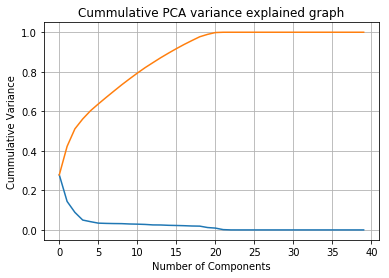

In [32]:
pca = PCA(n_components=X_scaled_train.shape[1])

# Building PCA only on the scaled training data set (not on whole data) to avoid bais with test data set.
pca.fit(X_scaled_train)

# Output PCA variance results
print("Singular values = \n",pca.singular_values_)  
print("\nProportion of variance = \n",pca.explained_variance_ratio_)  

# Plot the results to see how many features are really needed
plt.plot(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title("Cummulative PCA variance explained graph")
plt.xlabel("Number of Components")
plt.ylabel('Cummulative Variance')
plt.grid()

We can observe that the first 23 values have high variance and so we can pick those components for train and test data 

In [33]:
# Applying the PCA transform on the Training data set
X_pca_train = pca.transform(X_scaled_train)

# Set X_PCA_train to the chosen principal components
X_PCA_train = X_pca_train[:,:24]

# Applying the PCA transform on the Test data set
X_pca_test = pca.transform(X_scaled_test)
X_PCA_test = X_pca_test[:,:24]

print(X_PCA_train.shape)
print(X_PCA_test.shape)
# TODO: need to justify why we need or not need PCA <USE Pipeline perhaps>

(5634, 24)
(1409, 24)


# Algorithm Training, Model Selection and Evaluation

### Using Grid Search with Cross Validation to perform an exhaustive search over specified parameter values for SVM classifier

##### Reference: 
- http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://scikit-learn.org/stable/modules/grid_search.html

In [34]:
%%time

# Important parameters in SVC are: "C", "gamma" and the "kernel"
hyper_parameters = {'C':[1,10, 100],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
   
# Using a SVM classifier
# We need the probabilty set as True to get the ROC curve
classifier = SVC(probability=True, random_state=42)

# Using 5 fold cross-validation in grid search
model = GridSearchCV(classifier, hyper_parameters, cv=5, n_jobs=-1)
model.fit(X_PCA_train, y_train)

print("Best parameters set found on training set:")
print(model.best_params_)
print()

Best parameters set found on training set:
{'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
CPU times: user 10.2 s, sys: 1.05 s, total: 11.3 s
Wall time: 2min 59s


In [35]:
%%time

# Make predictions on test set
predictions = model.predict(X_PCA_test)

# Test accuracy
print("The accuray on the test data:")
print(metrics.accuracy_score(y_test, predictions))
print()

print("Detailed classification report:")
print(classification_report(y_test, predictions))
print()

print("Confusion matrix report:")
print(confusion_matrix(y_test, predictions))
print()

# TODO: Plot the consuion matrix

The accuray on the test data:
0.8211497515968772

Detailed classification report:
             precision    recall  f1-score   support

        0.0       0.85      0.91      0.88      1036
        1.0       0.70      0.56      0.63       373

avg / total       0.81      0.82      0.81      1409


Confusion matrix report:
[[947  89]
 [163 210]]
CPU times: user 256 ms, sys: 0 ns, total: 256 ms
Wall time: 253 ms


## Visualization of the ROC curve for the classification problem
##### Reference: 
- http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html


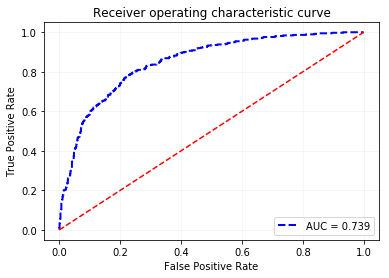

CPU times: user 496 ms, sys: 1.43 s, total: 1.93 s
Wall time: 411 ms


In [36]:
%%time

# Find the ROC curve:
# Call predict_proba on the estimator with the best found model parameters and find the area under the curve

probabilities = model.predict_proba(X_PCA_test)
    
fpr,tpr,thresholds = roc_curve(y_test,probabilities[:,1])

plt.plot(fpr,tpr,linestyle = "dashed",
         color = "blue", linewidth = 2,
         label = "AUC = " + str(np.around(roc_auc_score(y_test, predictions),3)))

plt.plot([0,1],[0,1],linestyle = "dashed", color = "red",linewidth = 1.5)

plt.legend(loc = "lower right", prop = {"size" : 12})
plt.grid(True, alpha = .15)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()